In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot  as plt
from tqdm import tqdm
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
from utils import *

# Part 1

In [ ]:
x0 = pd.read_csv("nonlinear_vectorfield_data_x0.txt", header=None, sep="\s")

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
x1 = pd.read_csv("nonlinear_vectorfield_data_x1.txt", header=None, sep="\s")

In [ ]:
x0.shape, x1.shape

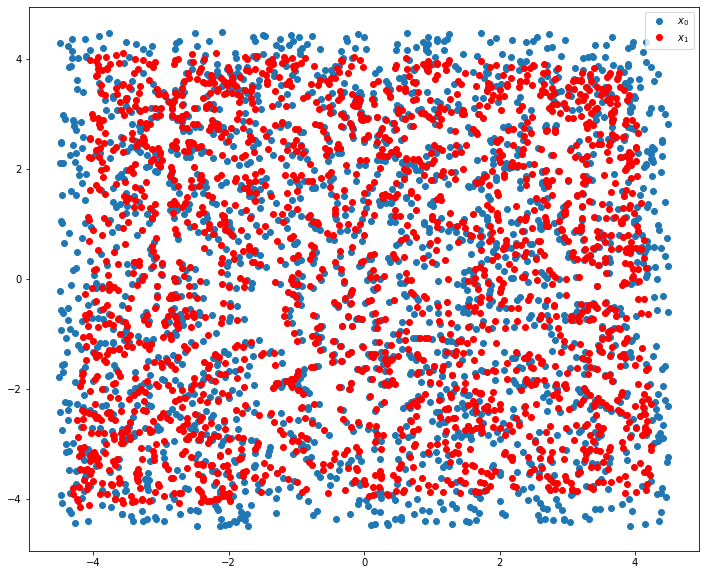

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(x0[0], x0[1], 'o', label='$x_0$')
plt.plot(x1[0], x1[1], 'ro', label='$x_1$')
#plt.plot(v[0], v[1], 'ko', label='Original data')
plt.legend()
plt.show()

In [ ]:
delta_t = 0.01

In [ ]:
v = (x1 - x0)/ delta_t
v

In [ ]:
v

0          1
0     -4.636843  11.532351
1     29.830417 -17.621114
2    -14.424929  11.923553
3     -8.199807  -9.086209
4     -5.364895   7.879590
...         ...        ...
1995  17.551871  -9.694101
1996  22.511341  10.893984
1997 -31.060253  -4.763255
1998 -22.470892  24.780244
1999   7.072796   7.704620

[2000 rows x 2 columns]

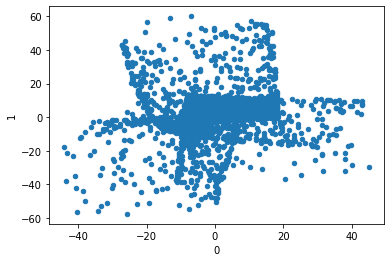

In [ ]:
v.plot(x=0, y=1, kind="scatter")

In [ ]:
X = np.vstack([x0, np.zeros_like((x0))])
X.shape

(4000, 2)

In [ ]:
x0.shape

(2000, 2)

In [ ]:
A = np.linalg.lstsq(x0, v, rcond=1e0-6)[0]
A.shape

(2, 2)

In [ ]:
A

array([[-1.0016012 ,  0.08672716],
       [-0.02534942, -4.32671381]])

In [ ]:
t_end = 0.1
estimate_x1 = []
for x0_1 in tqdm(x0.values):
    sol = solve_ivp(linear_system_task3, [0, t_end], x0_1, args=([A]), dense_output=True)
    estimate_x1.append(sol.y[:,0])
estimate_x1 = np.vstack(estimate_x1)

100%|██████████| 2000/2000 [00:00<00:00, 2345.21it/s]


In [ ]:
mse = (np.square(estimate_x1 - x1.values)).mean()
mse

0.02526400902802859

# Part 2 L = 100

In [ ]:
L_root = 10

In [ ]:
xl = np.linspace(-4.5, 4.5 , L_root)

In [ ]:
centers = np.vstack([np.array([x, y]) for x in xl for y in xl])

In [ ]:
# eps = np.std(x0.values)
eps = (xl[-1]-xl[0])/L_root

In [ ]:
eps, np.var(x0.values)

(0.45, 6.72298510648171)

## eps => std (eps)

In [ ]:
phi_x = radial_basis_function_faster(centers, x0.values, eps, False)
phi_x.shape

(2000, 900)

In [ ]:
C = np.linalg.lstsq(phi_x, (x1.values-x0.values)/0.01, rcond=1e0-6)[0].T
f_hat = phi_x@C.T

In [ ]:
%%time
t_end = 1
time = np.linspace(0,t_end,100)
sol = solve_ivp(nonlinear_system_task3, (time[0], time[-1]), x0.values.ravel(), args=([C, centers, eps, False, x0.shape]), t_eval=time)

CPU times: user 856 ms, sys: 642 ms, total: 1.5 s
Wall time: 995 ms


In [ ]:
estimate_x1 = np.zeros(x0.shape)
estimate_x1[:,0] = sol.y[::2][:,1]
estimate_x1[:,1] = sol.y[1::2][:,1]
mse = (np.square(estimate_x1 - x1.values)).mean()
mse

0.000142748354692818

## eps => var (eps**2)

In [ ]:
phi_x = radial_basis_function_faster(centers, x0.values, eps)
phi_x.shape

(2000, 900)

In [ ]:
A = np.linalg.lstsq(x0, v, rcond=1e0-6)[0]
A.shape

(2, 2)

In [ ]:
C = np.linalg.lstsq(phi_x, (x1.values-x0.values)/0.01, rcond=1e0-6)[0].T
f_hat = phi_x@C.T

In [ ]:
f_hat.shape

(2000, 2)

In [ ]:
%%time
t_end = 1
time = np.linspace(0,t_end,100)
sol = solve_ivp(nonlinear_system_task3, (time[0], time[-1]), x0.values.ravel(), args=([C, centers, eps, True, x0.shape]), t_eval=time)

CPU times: user 866 ms, sys: 530 ms, total: 1.4 s
Wall time: 1.37 s


In [ ]:
estimate_x1 = np.zeros(x0.shape)
estimate_x1[:,0] = sol.y[::2][:,1]
estimate_x1[:,1] = sol.y[1::2][:,1]
mse = (np.square(estimate_x1 - x1.values)).mean()
mse

0.000302908797843226

# Part 2 L = 900

In [ ]:
L_root = 30

In [ ]:
xl = np.linspace(-4.5, 4.5 , L_root)

In [ ]:
centers = np.vstack([np.array([x, y]) for x in xl for y in xl])

In [ ]:
# eps = np.std(x0.values)
eps = (xl[-1]-xl[0])/L_root

In [ ]:
eps, np.var(x0.values)

(0.3, 6.72298510648171)

## eps => std (eps)

In [ ]:
phi_x = radial_basis_function_faster(centers, x0.values, eps, False)
phi_x.shape

(2000, 900)

In [ ]:
C = np.linalg.lstsq(phi_x, (x1.values-x0.values)/0.01, rcond=1e0-6)[0].T
f_hat = phi_x@C.T

In [ ]:
%%time
t_end = 1
time = np.linspace(0,t_end,100)
sol = solve_ivp(nonlinear_system_task3, (time[0], time[-1]), x0.values.ravel(), args=([C, centers, eps, False, x0.shape]), t_eval=time)

CPU times: user 17.1 s, sys: 12 s, total: 29.2 s
Wall time: 16.1 s


In [ ]:
estimate_x1 = np.zeros(x0.shape)
estimate_x1[:,0] = sol.y[::2][:,1]
estimate_x1[:,1] = sol.y[1::2][:,1]
mse = (np.square(estimate_x1 - x1.values)).mean()
mse

0.051882903982421354

## eps => var (eps**2)

In [ ]:
phi_x = radial_basis_function_faster(centers, x0.values, eps)
phi_x.shape

(2000, 900)

In [ ]:
C = np.linalg.lstsq(phi_x, (x1.values-x0.values)/0.01, rcond=1e0-6)[0].T
f_hat = phi_x@C.T

In [ ]:
f_hat.shape

(2000, 2)

In [ ]:
%%time
t_end = 1
time = np.linspace(0,t_end,100)
sol = solve_ivp(nonlinear_system_task3, (time[0], time[-1]), x0.values.ravel(), args=([C, centers, eps, True, x0.shape]), t_eval=time)

CPU times: user 6.46 s, sys: 4.55 s, total: 11 s
Wall time: 5.76 s


In [ ]:
estimate_x1 = np.zeros(x0.shape)
estimate_x1[:,0] = sol.y[::2][:,1]
estimate_x1[:,1] = sol.y[1::2][:,1]
mse = (np.square(estimate_x1 - x1.values)).mean()
mse

0.0003882020889415485

# Part 3

In [ ]:
L_root = 30

In [ ]:
xl = np.linspace(-4.5, 4.5 , L_root)
eps = (4.5+4.5)/L_root 
centers = np.vstack([np.array([x, y]) for x in xl for y in xl])

phi_x = radial_basis_function_faster(centers, x0.values, eps)
C = np.linalg.lstsq(phi_x, (x1.values-x0.values)/0.01, rcond=1e0-6)[0].T

C.shape

(2, 900)

In [ ]:
t_end = 100
time = np.linspace(0.1,t_end,1000)

In [ ]:
%%time
sol = solve_ivp(nonlinear_system_task3, (time[0], time[-1]), x0.values.ravel(), args=([C, centers, eps, True, x0.shape]), t_eval=time)

CPU times: user 4min 29s, sys: 2min 51s, total: 7min 21s
Wall time: 3min 53s


<Figure size 1080x1080 with 0 Axes>

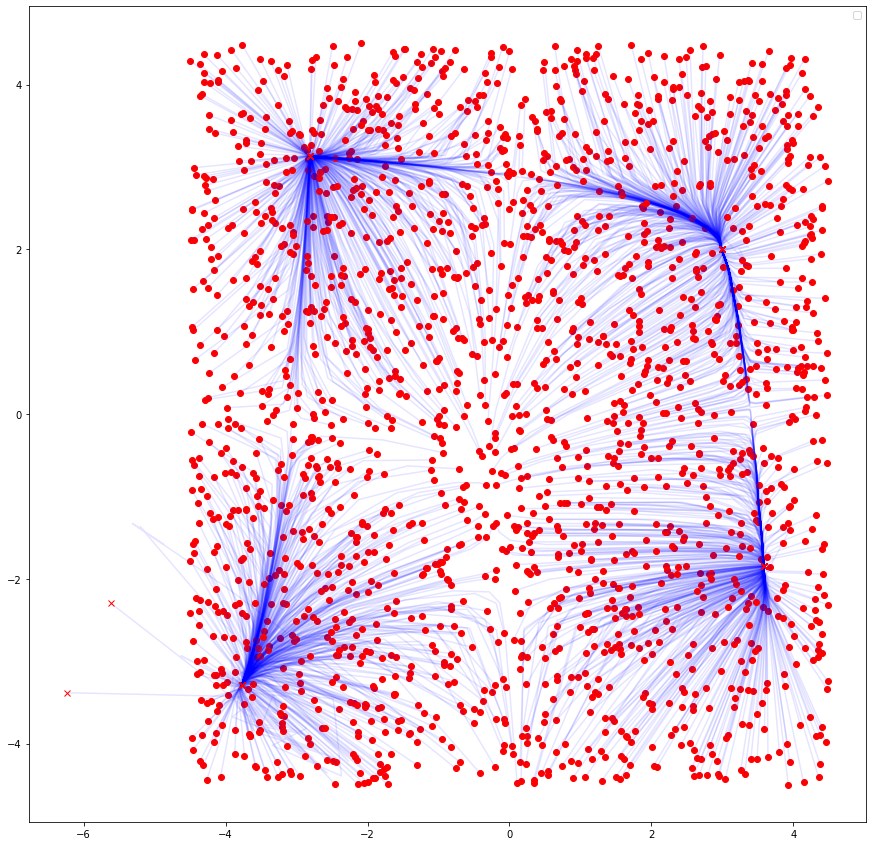

In [ ]:
fig = plt.figure(figsize=(15, 15))

x0_0 = sol.y[::2]
x0_1 = sol.y[1::2]

fig = plt.figure(figsize=(15, 15))

ax0 = fig.add_subplot()
for x, y in zip(x0_0, x0_1):#[index]:
    ax0.plot(x[0], y[0], "ro")
    ax0.plot(x, y, "b-", alpha=0.1)
    ax0.plot(x[-1], y[-1], "rx")
ax0.legend()